In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime 
%matplotlib inline

## 1. Explanatory Analysis

> This session aims to communicate findings gotten from the exploratory analysis

**KEY INSIGHTS**

1. The cost of borrowing is higher for non-homeowners across the year.

2. Most homeowners earn higher than non-homeowners.

3. There is a negative correlation between these lender yields and loan status, as loan amount increases, lender yield decreases

In [6]:
df_loan2 = pd.read_csv('loan_data.csv')

In [7]:
df_loan2.sample(2)

,Term,LoanOriginationDate,LoanOriginalAmount,LoanStatus,ProsperScore,ProsperRating (Alpha),MonthlyLoanPayment,BorrowerAPR,EstimatedReturn,LenderYield,IncomeRange,Occupation,EmploymentStatus,IsBorrowerHomeowner,MonthlyLoanPayment.1,DebtToIncomeRatio,ListingCategory (numeric),Year
18178,36,2007-10-29,10400,Completed,0,NaN,344.44,0.12500,NaN,0.108,"$25,000-49,999",Other,Full-time,False,344.44,0.16,0,2007
109891,60,2012-06-11,11000,Current,7,B,281.13,0.20705,0.128,0.173,"$25,000-49,999",Other,Employed,False,281.13,0.29,19,2012


### 1.1 Obersation 1 : The cost of borrowing is higher for non-homeowners across the year

In [8]:
base_color = sb.color_palette()[0]

In [15]:
df_loan2.BorrowerAPR.describe()

count    110345.000000
mean          0.219351
std           0.080627
min           0.006530
25%           0.156290
50%           0.210250
75%           0.285440
max           0.423950
Name: BorrowerAPR, dtype: float64

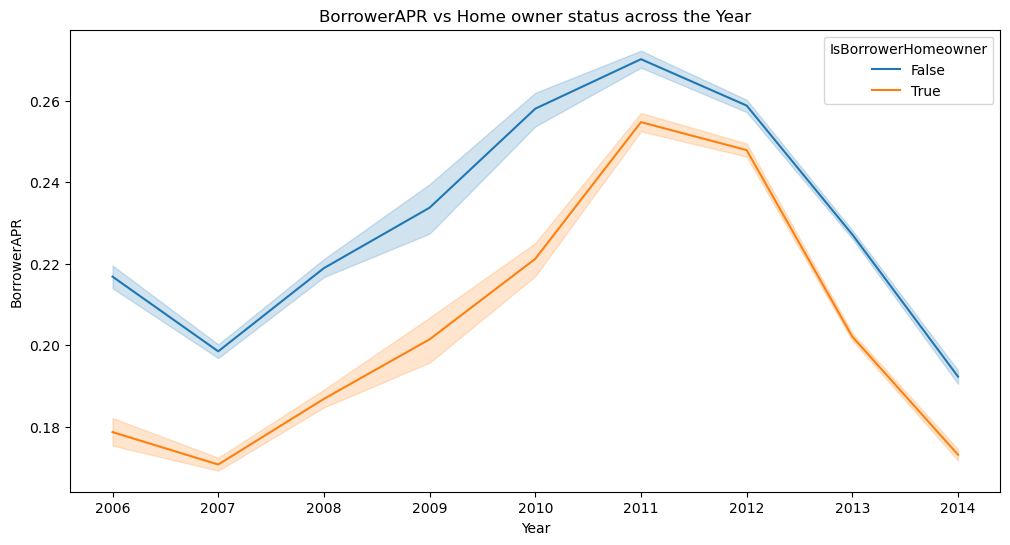

In [9]:
#comparing the borrower APR of home owners across the year
plt.figure(figsize = [12, 6])
sb.lineplot(data = df_loan2, x = 'Year', y = 'BorrowerAPR', hue = 'IsBorrowerHomeowner')
plt.title('BorrowerAPR vs Home owner status across the Year');

> The line plot above shows the status of homeowners across the year. It can be observed that borrower APR is higher for borrowers without homes. This means that the cost of borrowing is higher for non-homeowners across the year.

### 1.2 Obersavation 2 : Most homeowners earn higher than non-homeowners.

In [16]:
# setting the color palette
color = sb.color_palette("hls", 8)

In [17]:
#ordering the income range in descending format
income_order = ['$0', '$1-24,999','$25,000-49,999', '$50,000-74,999','$75,000-99,999']

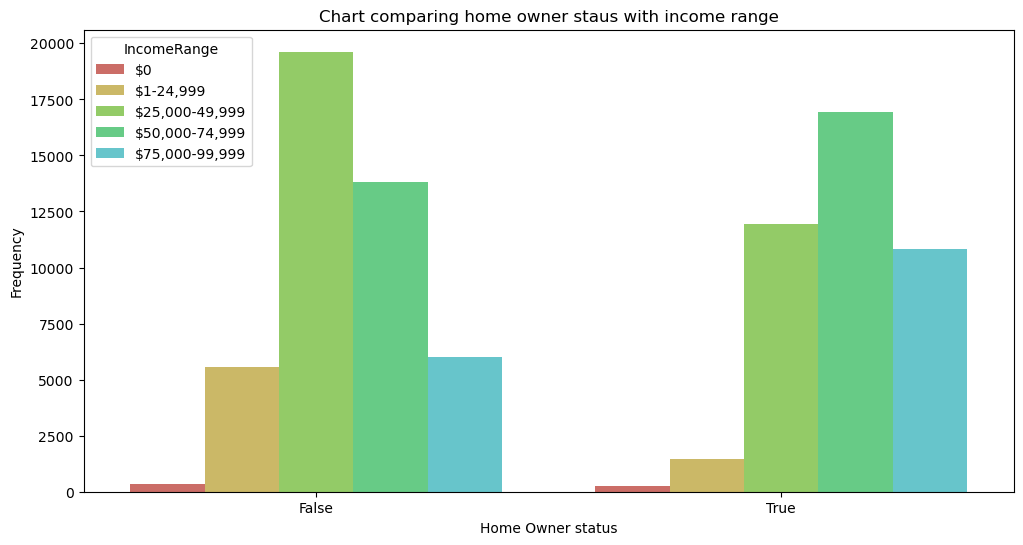

In [19]:
#home owner Vs income range
plt.figure(figsize = [12, 6])
#sns.color_palette("rocket", as_cmap=True)
sb.countplot(data = df_loan2, x = 'IsBorrowerHomeowner', hue = 'IncomeRange', hue_order = income_order, palette = color)
plt.title('Chart comparing home owner staus with income range')
plt.ylabel('Frequency')
plt.xlabel('Home Owner status');

> Similarly, The income range of homeowner status indicates that most homeowners earn higher than non-homeowners.

### 1.3 obersavation 3 :There is a negative correlation between these lender yields and loan status.

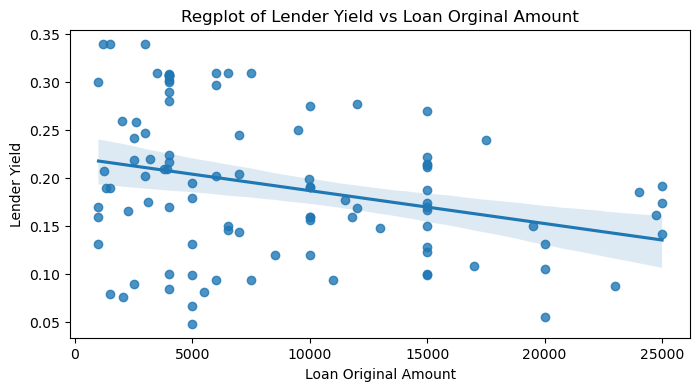

In [13]:
# plot showing the relationship between loan original amount and lenderyield
plt.figure(figsize = [8,4])
samples=df_loan2.sample(100)
loan_amount, lender=samples['LoanOriginalAmount'], samples['LenderYield']
sb.regplot(data = df_loan2, x = loan_amount, y = lender)
plt.title('Regplot of Lender Yield vs Loan Orginal Amount')
plt.xlabel('Loan Original Amount')
plt.ylabel('Lender Yield');

> This plot above shows a negative correlation between these two variables. as loan amount increases, lender yield decreases

### Conclusion
> The analysis of the prosper loan data began with cleaning the dataset to make it tidy and improve the quality of insights. Subsequently, an exploratory analysis was conducted to determine the key insight from the dataset. It can be concluded that Borrower APR significantly affects most variables. For borrowers registered as homeowners, the borrower APR appears to be less than that of non-homeowners, indicating that the cost of borrowing is higher for non-homeowners. Similarly, as the loan amount increases, the lender yield tender reduces. It is recommended that the loan amount should range between 10,000 to 15,000 to maintain optimal lender yield.